<a href="https://colab.research.google.com/github/Tunyalucklie/lantech/blob/main/Project_Language_Tech_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sentiment analysis for content moderation in social media communities**




picture

brief project explanation

In [1]:
import os
import math

import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# Download Dataset

In [2]:
training_data = pd.read_csv("https://raw.githubusercontent.com/Tunyalucklie/lantech/main/training_data_project.csv",encoding='utf-8')
testing_data = pd.read_csv("https://raw.githubusercontent.com/Tunyalucklie/lantech/main/testing_data_project.csv",encoding='utf-8')

Dataset information: .....

# Analysis on Sentence, Words and Class

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25414 entries, 0 to 25413
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  25414 non-null  object
 1   Label    25414 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 397.2+ KB


In [ ]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10892 entries, 0 to 10891
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  10892 non-null  object
 1   Label    10892 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 170.3+ KB


In [ ]:
training_data.head(5)

,Content,Label
0,the least controversial pms are those commonly...,0
1,oh families if a man talked like that to me,0
2,wee bullying blacks great once again,1
3,apology i apologize for my rudeness on span today,0
4,where the light went all the images [UNK],1


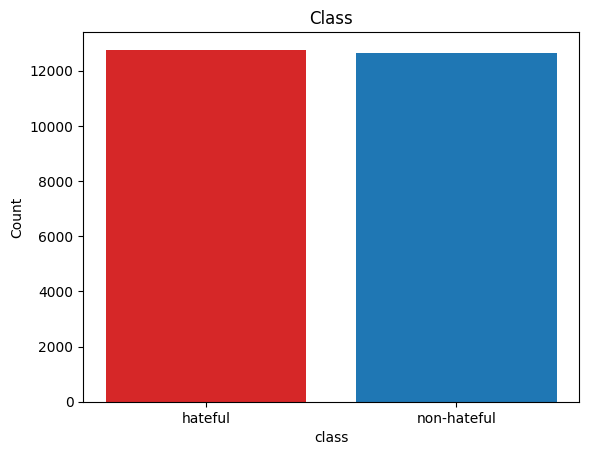

In [ ]:
#class value 1: hateful, 0: non-hateful
label_counts = training_data['Label'].value_counts()
labels = ['hateful', 'non-hateful']
colors = ['tab:red', 'tab:blue']

plt.title('Class')
plt.xlabel('class')
plt.ylabel('Count')
plt.bar(labels, label_counts, color=colors)
plt.show()

<Axes: >

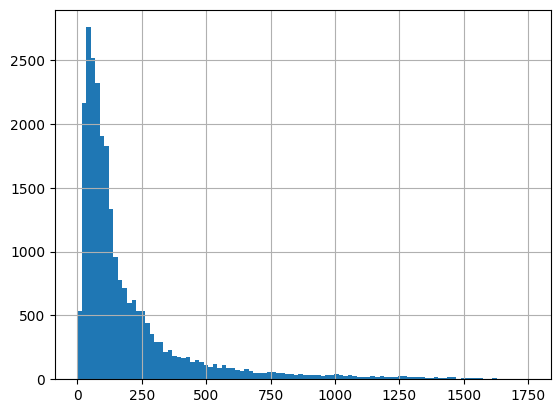

In [ ]:
#sentence length
training_data['Content'].str.len().hist(bins=100,range=(0,1750) )

<Axes: >

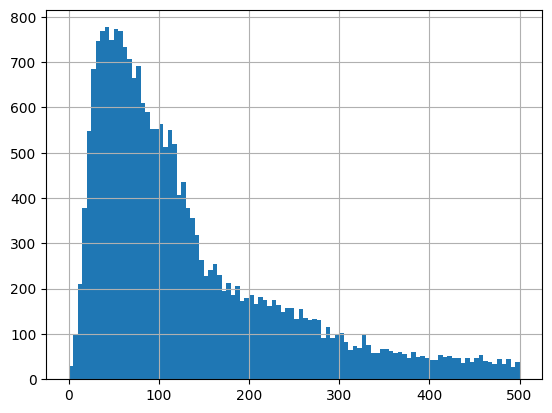

In [ ]:
#sentence length
training_data['Content'].str.len().hist(bins=100,range=(0,500) )

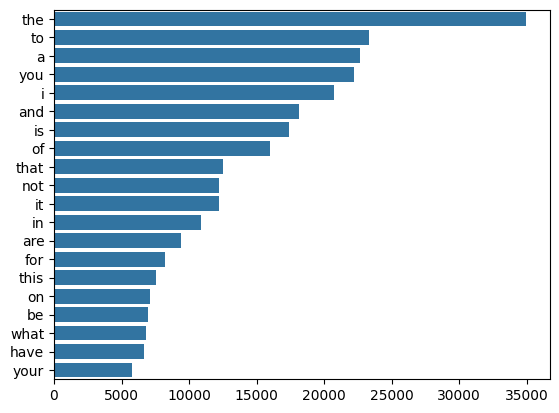

In [ ]:
#word_count
from collections import Counter

def graph_wordcount(text):

    stop=set(stopwords.words('english'))
    corpus=[]
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter= Counter(corpus)
    most=counter.most_common()

    x, y= [], []
    for word,count in most[:20]:
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)

graph_wordcount(training_data['Content'])

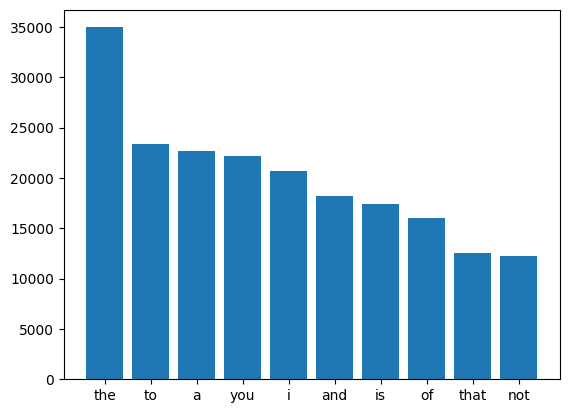

In [ ]:
#count stopword
def graph_stopwordcount(text):

    stop=set(stopwords.words('english'))
    corpus=[]
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)

graph_stopwordcount(training_data['Content'])

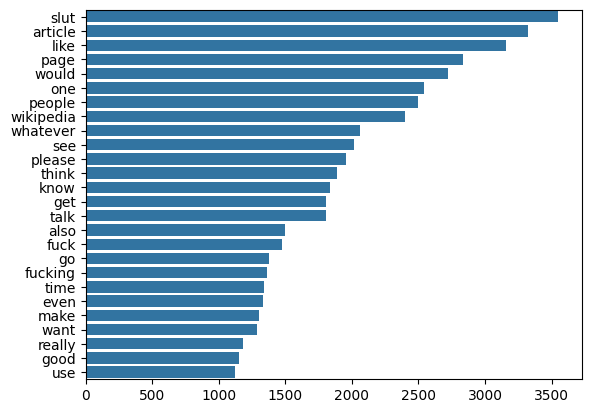

In [ ]:
def graph_nonstop_wordcount(text):

    stop=set(stopwords.words('english'))
    corpus=[]
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter= Counter(corpus)
    most=counter.most_common()

    x, y= [], []
    for word,count in most[:100]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)

graph_nonstop_wordcount(training_data['Content'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

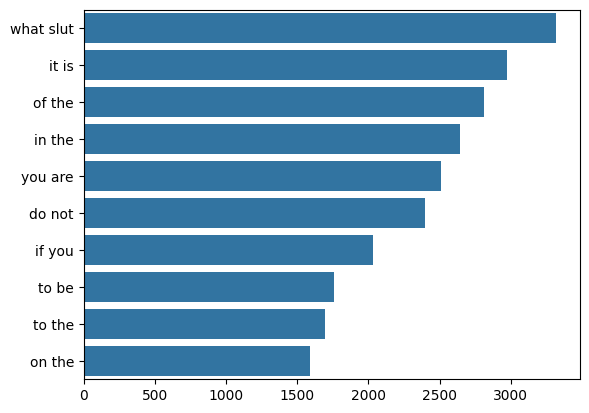

In [ ]:
#top bi-gram

plot_top_ngrams_barchart(training_data['Content'],2)

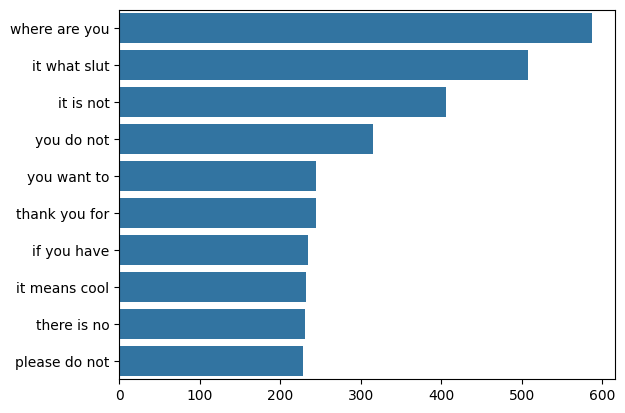

In [ ]:
#top tri-gram
plot_top_ngrams_barchart(training_data['Content'],3)

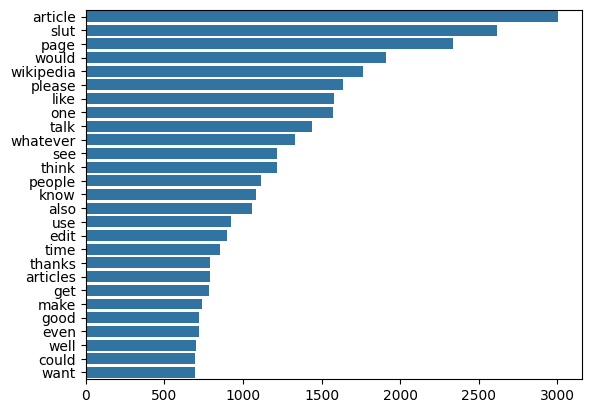

In [ ]:
#non-hateful label word count
non_text = training_data.loc[training_data['Label'] == 0, ['Content']]
graph_nonstop_wordcount(non_text['Content'])


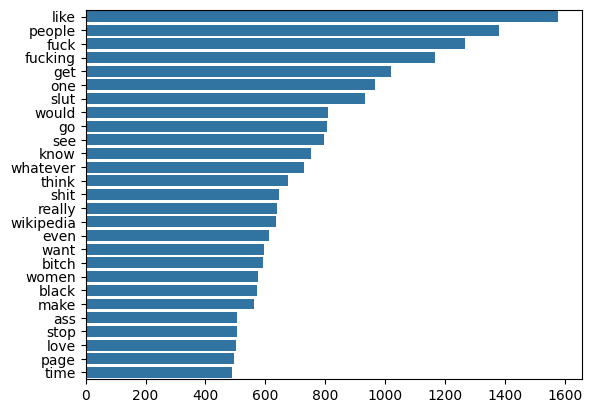

In [ ]:
#hateful label word count
hateful_text = training_data.loc[training_data['Label'] == 1, ['Content']]
graph_nonstop_wordcount(hateful_text["Content"])

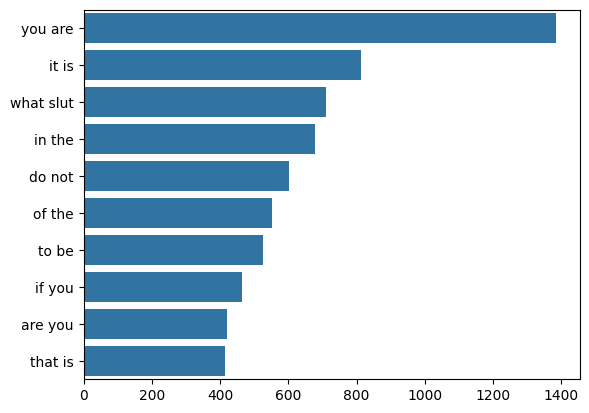

In [ ]:
#negative bigram
plot_top_ngrams_barchart(hateful_text['Content'], n=2)

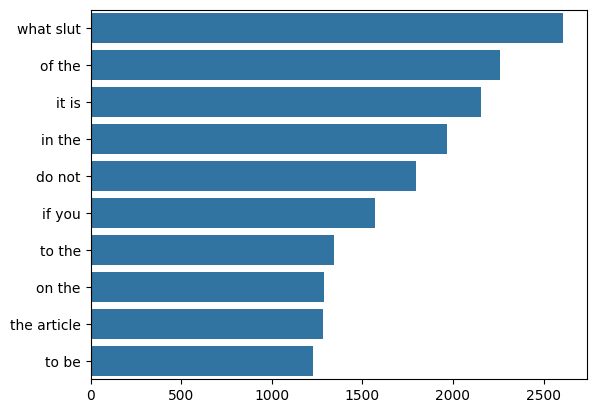

In [ ]:
#non-hateful bigram
plot_top_ngrams_barchart(non_text['Content'], n=2)

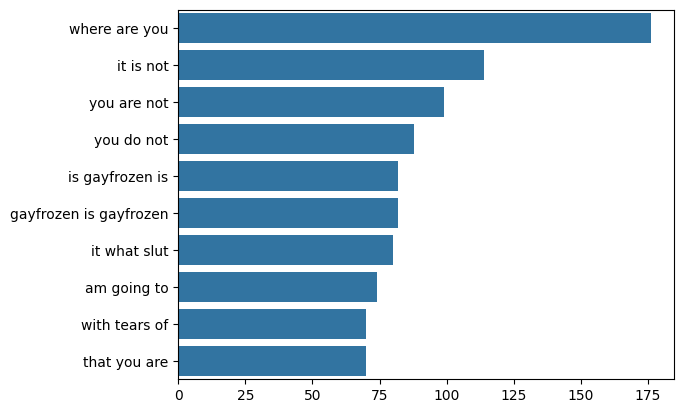

In [ ]:
#hateful tri-gram
plot_top_ngrams_barchart(hateful_text['Content'],3)

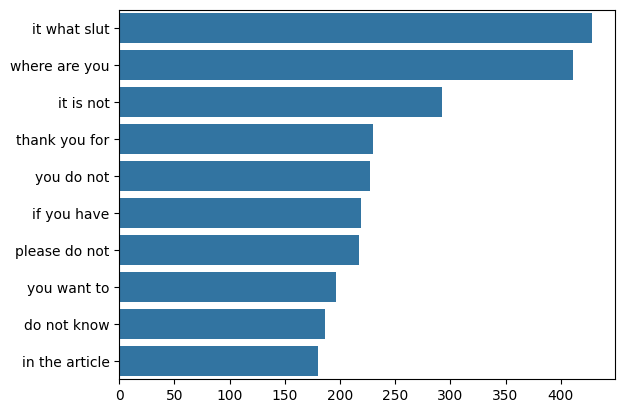

In [ ]:
#non-hateful trigram
plot_top_ngrams_barchart(non_text['Content'],3)

<Axes: >

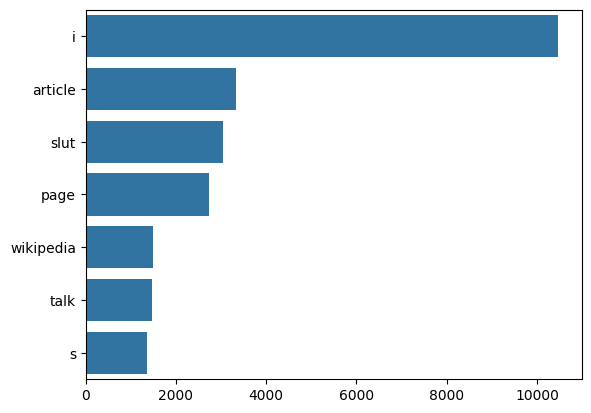

In [ ]:
# pos, verb
from nltk.tokenize import word_tokenize
from collections import Counter

def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj

words = training_data['Content'].apply(lambda x : get_adjs(x))
words = [x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

In [ ]:
def word_filter(df, word):
    mask = df['Content'].apply(lambda text: word in text.split())
    df = df.loc[mask].reset_index(drop=True)
    return df

In [ ]:
hateful_example = word_filter(hateful_text,'fuck')
hateful_example

,Content
0,now the user is you zimmerman what a slut thro...
1,nazi crime what a slut a result of pan germani...
2,my neighbor who is a mixed race transgender wo...
3,unwarranted block please explain why you block...
4,ok mr sarky since you dress non check your fac...
...,...
703,my best friend who is allergic to wheat corn s...
704,shut the fuck up you pussy clearly the white g...
705,my grandmother what a slut telling me that she...
706,why do not you tell that to the idiot who says...


In [ ]:
non_hateful_example = word_filter(non_text,'slut')
non_hateful_example

,Content
0,meowy i have yet to expand this article really...
1,old debate hmmmm i seem to recall immediately ...
2,i changed the date from to the reference is a ...
3,is this a defensive stand for theo or an offen...
4,regarding restoring my user page yes duh i for...
...,...
1778,jeff william connelly is a moderator at wikipe...
1779,utc decline there is a good deal of truth in w...
1780,ira black musician dear hayworth i would like ...
1781,joey needed joey needed what a slut born


# Preprocessing
- data praparation for training

In [3]:
def text_clean(text, method, rm_stop):
    text = re.sub(r"\n","",text)   #remove line breaks
    text = text.lower() #convert to lowercase
    text = re.sub(r"\d+","",text)   #remove digits and currencies
    text = re.sub(r'[\$\d+\d+\$]', "", text)
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)   #remove dates
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)
    text = re.sub(r'[^\x00-\x7f]',r' ',text)   #remove non-ascii
    text = re.sub(r'[^\w\s]','',text)   #remove punctuation
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)   #remove hyperlinks

    #remove stop words
    if rm_stop == True:
        filtered_tokens = [word for word in word_tokenize(text) if not word in set(stopwords.words('english'))]
        text = " ".join(filtered_tokens)

    #lemmatization: typically preferred over stemming
    if method == 'L':
        lemmer = WordNetLemmatizer()
        lemm_tokens = [lemmer.lemmatize(word) for word in word_tokenize(text)]
        return " ".join(lemm_tokens)

    #stemming
    if method == 'S':
        porter = PorterStemmer()
        stem_tokens = [porter.stem(word) for word in word_tokenize(text)]
        return " ".join(stem_tokens)

    return text

In [4]:
#define x train, y_train
X_train, Y_train = np.array(training_data['Content']), np.array(training_data['Label'])
X_test, Y_test = np.array(testing_data['Content']), np.array(testing_data['Label'])

In [45]:
#data without preprocessing
text_0 = X_train

#preprocessed data: Lemm + stopword removal
preprocessed_text_1 = [text_clean(text, 'L', True) for text in X_train]
preprocessed_text_1_test = [text_clean(text, 'L', True) for text in X_test]
#preprocessed_text_1[0:10]

# #preprocessed data: Lemm + no stopword removal
# preprocessed_text_2 = [text_clean(text, 'L', False) for text in X_train]
# #preprocessed_text_2[0:10]

# #preprocessed data: Stem + stopword removal
# preprocessed_text_3 = [text_clean(text, 'S', True) for text in X_train]
# #preprocessed_text_3[0:10]

# #preprocessed data: Stem + no stopword removal
# preprocessed_text_4 = [text_clean(text, 'S', False) for text in X_train]
# #preprocessed_text_4[0:10]

# System Development
- training models including NaiveBayes clssifer, SVM and LSTM
- Intrinsic evalution on each models
- optimization on each models


# NaiveBayes Model

lab method

In [5]:
#make data structure
# zero is positive , one is negative
train_dict = [{'words': sentence.split(), 'class': 'neg' if label == 1 else 'pos'} for sentence, label in zip(X_train, Y_train)]
test_dict = [{'words': sentence.split(), 'class': 'neg' if label == 1 else 'pos'} for sentence, label in zip(X_test, Y_test)]

print(train_dict[0])
print(test_dict[0])

{'words': ['the', 'least', 'controversial', 'pms', 'are', 'those', 'commonly', 'known', 'as', 'instincts', 'including', 'human', 'capacities', 'for', 'digestion', 'interpreting', 'stereoscopic', 'vision', 'suckling', 'a', 'mother', 's', 'breast', 'etc', 'i', 'does', 'not', 'know', 'that', 'digestion', 'is', 'a', 'psychological', 'process', 'or', 'type', 'of', 'behavior', 'it', 'is', 'a', 'physiological', 'biochemical', 'process', 'largely', 'outside', 'the', 'bounds', 'of', 'cognitive', 'action', 'i', 'do', 'not', 'believe', 'it', 'belongs', 'grouped', 'with', 'instincts'], 'class': 'pos'}
{'words': ['mark', 'are', 'you', 'really', 'an', 'entity', 'made', 'of', 'pure', 'energy', 'is', 'your', 'ass', 'still', 'painful'], 'class': 'neg'}


In [6]:
class NaiveBayes(object):

    def predict(self, d): #d is data, represent a sentense
        # TODO: Replace the following line with your own code to solve Problem 2
        pr_P=0 #positive
        pr_N=0 #negative
        for word in d:
            if word in self.vocabulary:
                pr_P=pr_P+self.pw['pos'][word] #pw means Pr(w|c)
                pr_N=pr_N+self.pw['neg'][word]
            else:
                pass
        pr_P=pr_P+self.pc['pos']
        pr_N=pr_N+self.pc['neg']
        # print("predict finished")
        if(pr_P>pr_N):
            return 'pos'
        else:
            return 'neg'


    @classmethod
    def train(cls, data, k=0.1):
        # The following line creates a new object of type OurClassifier:
        classifier = cls()
        # The next few lines initialise the four attributes of the classifier:
        classifier.classes = set()
        classifier.vocabulary = set()
        classifier.pc = {}
        classifier.pw = {}

        # TODO: Insert code to solve Problem 2

        for i in range(len(data)): #create classes and count occurance numbers
            newclass=data[i]['class']
            if newclass not in classifier.classes:
                classifier.classes.add(newclass) #add newclass
                classifier.pc[newclass]=1        #initialize the occurance number of this new class
                classifier.pw[newclass]={}        #create the new class dictionary of probability

            else:
                classifier.pc[newclass]+=1       #increment occurrence count of the existing class by 1

        for classes in classifier.pc: #calculate probabilities of classes
            classifier.pc[classes]=math.log(classifier.pc[classes]/len(data))

        for i in range(len(data)): #create vocabulary and count occurance numbers
            thisclass=data[i]['class']
            sentence=data[i]['words']
            for words in sentence:
                if words not in classifier.vocabulary: #if we find a new word
                    classifier.vocabulary.add(words)
                    for c in classifier.classes:
                        classifier.pw[c][words]=k
                    classifier.pw[thisclass][words]+=1
                else:
                    classifier.pw[thisclass][words]+=1
        for c in classifier.pw:
            total=sum(list(classifier.pw[c].values()))
            for word in classifier.pw[c]:
                classifier.pw[c][word]=math.log(classifier.pw[c][word]/total)

        return classifier

In [7]:
#evaluation in-class method

def accuracy(classifier, samples):
    """Compute the accuracy of a classifier on a list of gold-standard samples."""
    # TODO: Implement this method to solve Problem 2
    correct_pred = 0
    for sample in samples:
        if classifier.predict(sample['words']) == sample['class']:
            correct_pred = correct_pred + 1
    return 0 if len(samples) == 0 else float(correct_pred/len(samples))

def precision(classifier, c, samples):
    """Compute the class-specific precision of a classifier on a list of gold-standard samples."""
    # TODO: Implement this method to solve Problem 2
    total_class_predictions = 0
    correct_class_predictions = 0
    for sample in samples:
        prediction = classifier.predict(sample['words'])
        if prediction != c:
            continue
        total_class_predictions = total_class_predictions + 1
        if sample['class'] == prediction:
            correct_class_predictions = correct_class_predictions + 1
    return 0 if total_class_predictions == 0 else float(correct_class_predictions/total_class_predictions)

def recall(classifier, c, samples):
    """Compute the class-specific recall of a classifier on a list of gold-standard samples."""
    # TODO: Implement this method to solve Problem 2
    correct_class_predictions = 0
    total_of_class = 0
    for sample in samples:
        prediction = classifier.predict(sample['words'])
        if sample['class'] != c:
            continue
        total_of_class = total_of_class + 1
        if sample['class'] == prediction:
            correct_class_predictions = correct_class_predictions + 1
    return 0 if total_of_class == 0 else float(correct_class_predictions/total_of_class)

def our_evaluate(classifier, samples):
    print("accuracy = {:.2%}".format(accuracy(classifier, samples)))
    for c in sorted(classifier.classes):
        p = precision(classifier, c, samples)
        r = recall(classifier, c, samples)
        # TODO: Change the next line to compute the F1-score
        f = (2*p*r)/(p+r)
        print("class {}: precision = {:.2%}, recall = {:.2%}, f1 = {:.2%}".format(c, p, r, f))


In [8]:
classifier= NaiveBayes.train(train_dict)
our_evaluate(classifier, test_dict)

accuracy = 78.60%
class neg: precision = 73.96%, recall = 88.58%, f1 = 80.61%
class pos: precision = 85.60%, recall = 68.53%, f1 = 76.12%


In [9]:
result = NaiveBayes.predict(classifier,X_test[0])
print(result,Y_test[0])

neg 1


outsource libralies

In [10]:
#evaluation
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

def evaluation(Y_test, predictions):
    accuracy = accuracy_score( Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)

    print("Accuracy:",round(100*accuracy,2),'%')
    print("Precision:", round(100*precision,2),'%')
    print("Recall:", round(100*recall,2),'%')
    print("F1:", round(100*f1,2),'%')

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


#Extract features from the text data: Bow vectorizing, training , predicting
def modelNB(X_train,Y_train):
    #vectorize dataset to Bow -> Learn the vocabulary dictionary and return term-document matrix
    vectorizer = CountVectorizer()
    vectorized_X_train = vectorizer.fit_transform(X_train)

    #train model with add 0.1 smooth
    model = MultinomialNB(alpha=0.1)
    model.fit(vectorized_X_train, Y_train)

    return vectorizer, model

In [13]:
# first attemp
vectorizer, NB_classifier = modelNB(X_train, Y_train)
# predict_model
predictions_NB = NB_classifier.predict(vectorizer.transform(X_test))
# evaluation
evaluation(Y_test, predictions_NB )

Accuracy: 78.28 %
Precision: 73.68 %
Recall: 88.3 %
F1: 80.33 %


In [46]:
#other style text
vectorizer_1, NB_classifier_1 = modelNB(preprocessed_text_1 ,Y_train)
# vectorizer_2, NB_classifier_2  = modelNB(preprocessed_text_2, Y_train)
# vectorizer_3, NB_classifier_3  = modelNB(preprocessed_text_3, Y_train)
# vectorizer_4 ,NB_classifier_4  = modelNB(preprocessed_text_4, Y_train)

In [47]:
# with clean data
# vectorize, model, and evaluate model using CountVectorizer

#Lemm + stopword removal
print("Lemm + stopword removal + CountVectorizer")
predictions_NB_1 = NB_classifier_1.predict(vectorizer_1.transform(preprocessed_text_1_test))
evaluation(Y_test, predictions_NB_1)

# # #Lemm + no stopword removal
# # print("\nLemm + no stopword removal + CountVectorizer")
# predictions_NB_2 = NB_classifier_2.predict(vectorizer_2.transform(preprocessed_text_2_test))
# evaluation(Y_test, predictions_NB_2)

# # #Stem + stopword removal
# # print("\nStem + stopword removal + CountVectorizer")
# predictions_NB_3 = NB_classifier_3.predict(vectorizer_3.transform(preprocessed_text_3_test))
# evaluation(Y_test, predictions_NB_3)

# # #Stem + no stopword removal
# # print("\nStem + no stopword removal + CountVectorizer")
# predictions_NB_4 = NB_classifier_4.predict(vectorizer_4.transform(preprocessed_text_4_test))
# evaluation(Y_test, predictions_NB_4)

Lemm + stopword removal + CountVectorizer
Accuracy: 78.07 %
Precision: 73.68 %
Recall: 87.64 %
F1: 80.06 %


# SVM Model

In [14]:
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()
x_train_vectorize = vectorizer.fit_transform(X_train)
x_test_vectorize = vectorizer.transform(X_test)
svm_classifier = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm_classifier.fit(x_train_vectorize, Y_train)
prediction = svm_classifier.predict(x_test_vectorize)


In [15]:
print(evaluation(prediction, Y_test))

Accuracy: 77.78 %
Precision: 79.62 %
Recall: 76.95 %
F1: 78.26 %
None


In [ ]:
import pickle
# save the model to disk
filename = 'SVM_model.sav'
pickle.dump(svm_classifier, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

# LSTM Model

In [21]:
# Import the necessary libraries
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.models import Sequential


# Preprocess the text data using a Tokenizer
max_words = 3000
max_len = 500
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
X = pad_sequences(sequences, maxlen=max_len)

# Build the model
# Define parameter
n_lstm = 128
drop_lstm = 0.2
embedding_dim = 16

# Define LSTM Model
model1 = Sequential()
model1.add(Embedding(max_words, embedding_dim, input_length=max_len))
model1.add(SpatialDropout1D(drop_lstm))
model1.add(LSTM(n_lstm, return_sequences=False))
model1.add(Dropout(drop_lstm))
model1.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
model1.fit(X, Y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping], verbose=2)

Epoch 1/30
636/636 - 540s - loss: 0.5533 - accuracy: 0.7153 - val_loss: 0.4657 - val_accuracy: 0.7724 - 540s/epoch - 849ms/step
Epoch 2/30
636/636 - 470s - loss: 0.4310 - accuracy: 0.8016 - val_loss: 0.4344 - val_accuracy: 0.7942 - 470s/epoch - 739ms/step
Epoch 3/30
636/636 - 462s - loss: 0.3928 - accuracy: 0.8244 - val_loss: 0.4341 - val_accuracy: 0.7917 - 462s/epoch - 726ms/step
Epoch 4/30
636/636 - 580s - loss: 0.3770 - accuracy: 0.8306 - val_loss: 0.4600 - val_accuracy: 0.7922 - 580s/epoch - 912ms/step
Epoch 5/30
636/636 - 445s - loss: 0.3604 - accuracy: 0.8395 - val_loss: 0.4451 - val_accuracy: 0.7921 - 445s/epoch - 699ms/step


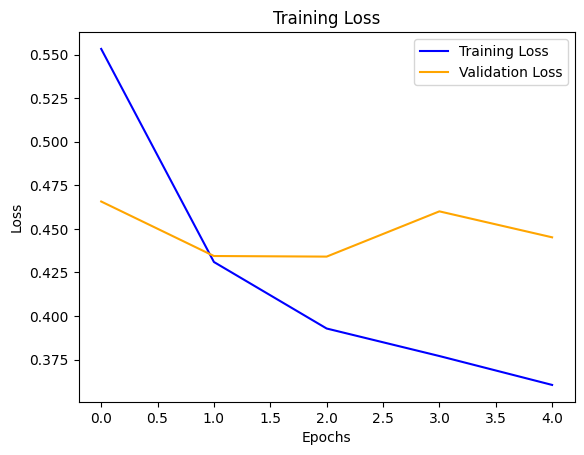

In [22]:
import matplotlib.pyplot as plt
# Plot the loss graph
plt.plot(model1.history.history['loss'], label='Training Loss', color="blue")
plt.plot(model1.history.history['val_loss'], label='Validation Loss', color="orange")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [23]:
# Predict the class of a new text
new_sequences = tokenizer.texts_to_sequences(X_test)
new_X = pad_sequences(new_sequences, maxlen=max_len)
prediction_lstm = model1.predict(new_X)
#print(prediction_lstm_0 )  # Output: [[0.5]]

341/341 [==============================] - 85s 248ms/step


In [24]:
prediction_lstm_0 = np.where(prediction_lstm >= 0.5, 1, 0)

In [25]:
evaluation(Y_test,prediction_lstm_0)

Accuracy: 78.87 %
Precision: 76.1 %
Recall: 84.46 %
F1: 80.07 %


# Systems Evaluation and Result Analysis

testing on unseen data

In [27]:
import pandas as pd
unseen_data = pd.read_csv('unseen_testing_df.csv')
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [53]:
unseen_data

,id,label,tweet,Predicted Sentiment_NB
0,1,0,@user when a father is dysfunctional and is s...,neg
1,2,0,@user @user thanks for #lyft credit i can't us...,neg
2,3,0,bihday your majesty,neg
3,4,0,#model i love u take with u all the time in ...,neg
4,5,0,factsguide: society now #motivation,neg
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,neg
31958,31959,0,to see nina turner on the airwaves trying to...,neg
31959,31960,0,listening to sad songs on a monday morning otw...,neg
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",neg


In [30]:
# Text preprocessing function (adjust based on your needs)
from nltk import word_tokenize # Import for tokenization (optional) import nltk. corpus # Import for stop words (optional)

def preprocess_text (text):
  # Preprocessing steps (e.g., tokenization, stop word removal, lowercase conversion, etc.)
  stop_words = set(nltk.corpus.stopwords.words ('english')) # Download stop words if needed
  tokens = word_tokenize (text)
  filtered_words = [word. lower() for word in tokens if word not in stop_words]
  preprocessed_text = " ".join (filtered_words)
  return preprocessed_text

# Load your unseen data
unseen_text = unseen_data["tweet"] # Assuming text is in "Content" column
unseen_label =  unseen_data["label"]

# Preprocess unseen data (consistent with training data)
unseen_data_preprocessed = [preprocess_text(text) for text in unseen_text]

**Comparison Performance on Different Models**

In [31]:
#evaluation
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

def evaluation(Y_test, predictions):
    accuracy = accuracy_score( Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)

    print("Accuracy:",round(100*accuracy,2),'%')
    print("Precision:", round(100*precision,2),'%')
    print("Recall:", round(100*recall,2),'%')
    print("F1:", round(100*f1,2),'%')

SVM performance on unseen test dataset

In [32]:
# Feature extraction (using the same vectorizer for consistency)
unseen_vectorized = vectorizer.transform(unseen_data_preprocessed)
# Make predictions on unseen data
unseen_predictions = svm_classifier.predict(unseen_vectorized)

# No evaluation possible without ground truth labels for unseen data
# print ("Predicted sentiment labels for unseen data:")
# print (unseen_predictions)

# unseen_data["Predicted Sentiment"] = unseen_predictions

evaluation(unseen_label, unseen_predictions)

# Save the updated unseen data with predicted labels to a new CSV file
# unseen_data.to_csv("unseen_data_with_sentiment.csv", index=False)  # Adjust filename as needed

# print("Predicted sentiment labels appended to unseen data. Saved to unseen_data_with_sentiment.csv")

Accuracy: 72.92 %
Precision: 13.17 %
Recall: 51.16 %
F1: 20.95 %
Predicted sentiment labels appended to unseen data. Saved to unseen_data_with_sentiment.csv


LSTM performance on unseen test dataset

In [33]:
# Preprocess unseen data (consistent with training data)
unseen_text_preprocessed = [preprocess_text(text) for text in unseen_text]  # Assuming preprocess_text handles unseen data
unseen_sequences = tokenizer.texts_to_sequences(unseen_text_preprocessed)
unseen_X = pad_sequences(unseen_sequences, maxlen=max_len)

# Make predictions on unseen data
unseen_predictions = model1.predict(unseen_X)
unseen_predictions_class = np.where(unseen_predictions >= 0.5, 1, 0)  # Convert to class labels (0 or 1)

# Evaluation
evaluation(unseen_label,unseen_predictions_class )


999/999 [==============================] - 257s 258ms/step
Accuracy: 63.37 %
Precision: 11.61 %
Recall: 63.87 %
F1: 19.65 %


NB performance on unseen test dataset

In [54]:
preprocessed_unseen_text_2 = [text_clean(text, 'L', True) for text in unseen_text]

In [55]:
# Assuming unseen_data is a DataFrame with "text" column
unseen_predictions_nb = NB_classifier_1.predict(vectorizer_1.transform(preprocessed_unseen_text_2))
# unseen_predictions_nb = np.array([classifier.predict(text) for text in unseen_text])
# unseen_predictions_nb = np.where(unseen_predictions_nb == 'neg', 1, 0)
# unseen_data["Predicted Sentiment_NB"] = unseen_predictions_nb

# Evaluation
evaluation(unseen_label ,unseen_predictions_nb )
# print("Predicted sentiment labels for unseen data (Naive Bayes):")
# print(unseen_predictions_nb)
# unseen_data.to_csv("unseen_data_with_sentiment_NB.csv", index=False)  # Adjust filename as needed
# print("Predicted sentiment labels appended to unseen data. Saved to unseen_data_with_sentiment_NB.csv")

Accuracy: 54.34 %
Precision: 10.14 %
Recall: 70.07 %
F1: 17.71 %


This illustration compares the final results

Final model will be : ...

# Model Deployment

In [62]:
def predict_finalmodel(input_text):
    input_vectorized = vectorizer.transform([input_text])
    pred_result =  svm_classifier.predict(input_vectorized)

    return pred_result


In [78]:
# model input - prompt

input_text = ''

pred_result = predict_finalmodel(input_text)
print(pred_result)

[1]
